In [882]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [973]:
train = pd.read_csv('./input/project/abalone_dataset/train.csv')
test = pd.read_csv('./input/project/abalone_dataset/test.csv')
df = pd.DataFrame(train)
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


# EDA

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [885]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [886]:
df.drop('id', axis=1, inplace=True)

In [887]:
df.duplicated().sum()

0

In [888]:
df['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

Let's investigate the distribution of rings for each sex.

<Axes: xlabel='Sex', ylabel='Rings'>

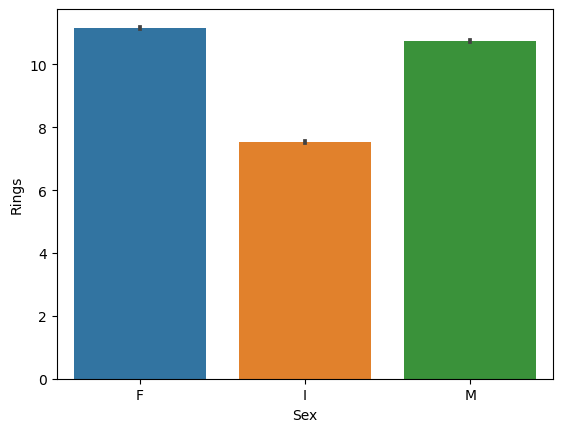

In [889]:
sns.barplot(data=df, x='Sex' , y='Rings')

In [890]:
df.groupby(['Sex']).mean()['Rings']

Sex
F    11.161389
I     7.533557
M    10.753408
Name: Rings, dtype: float64

Both the count plot and groupby analysis reveal that females and males exhibit similar ring distributions, whereas individuals with an 'I' sex designation tend to have fewer rings compared to females and males.

Let's investigate the distribution of rings for each sex.

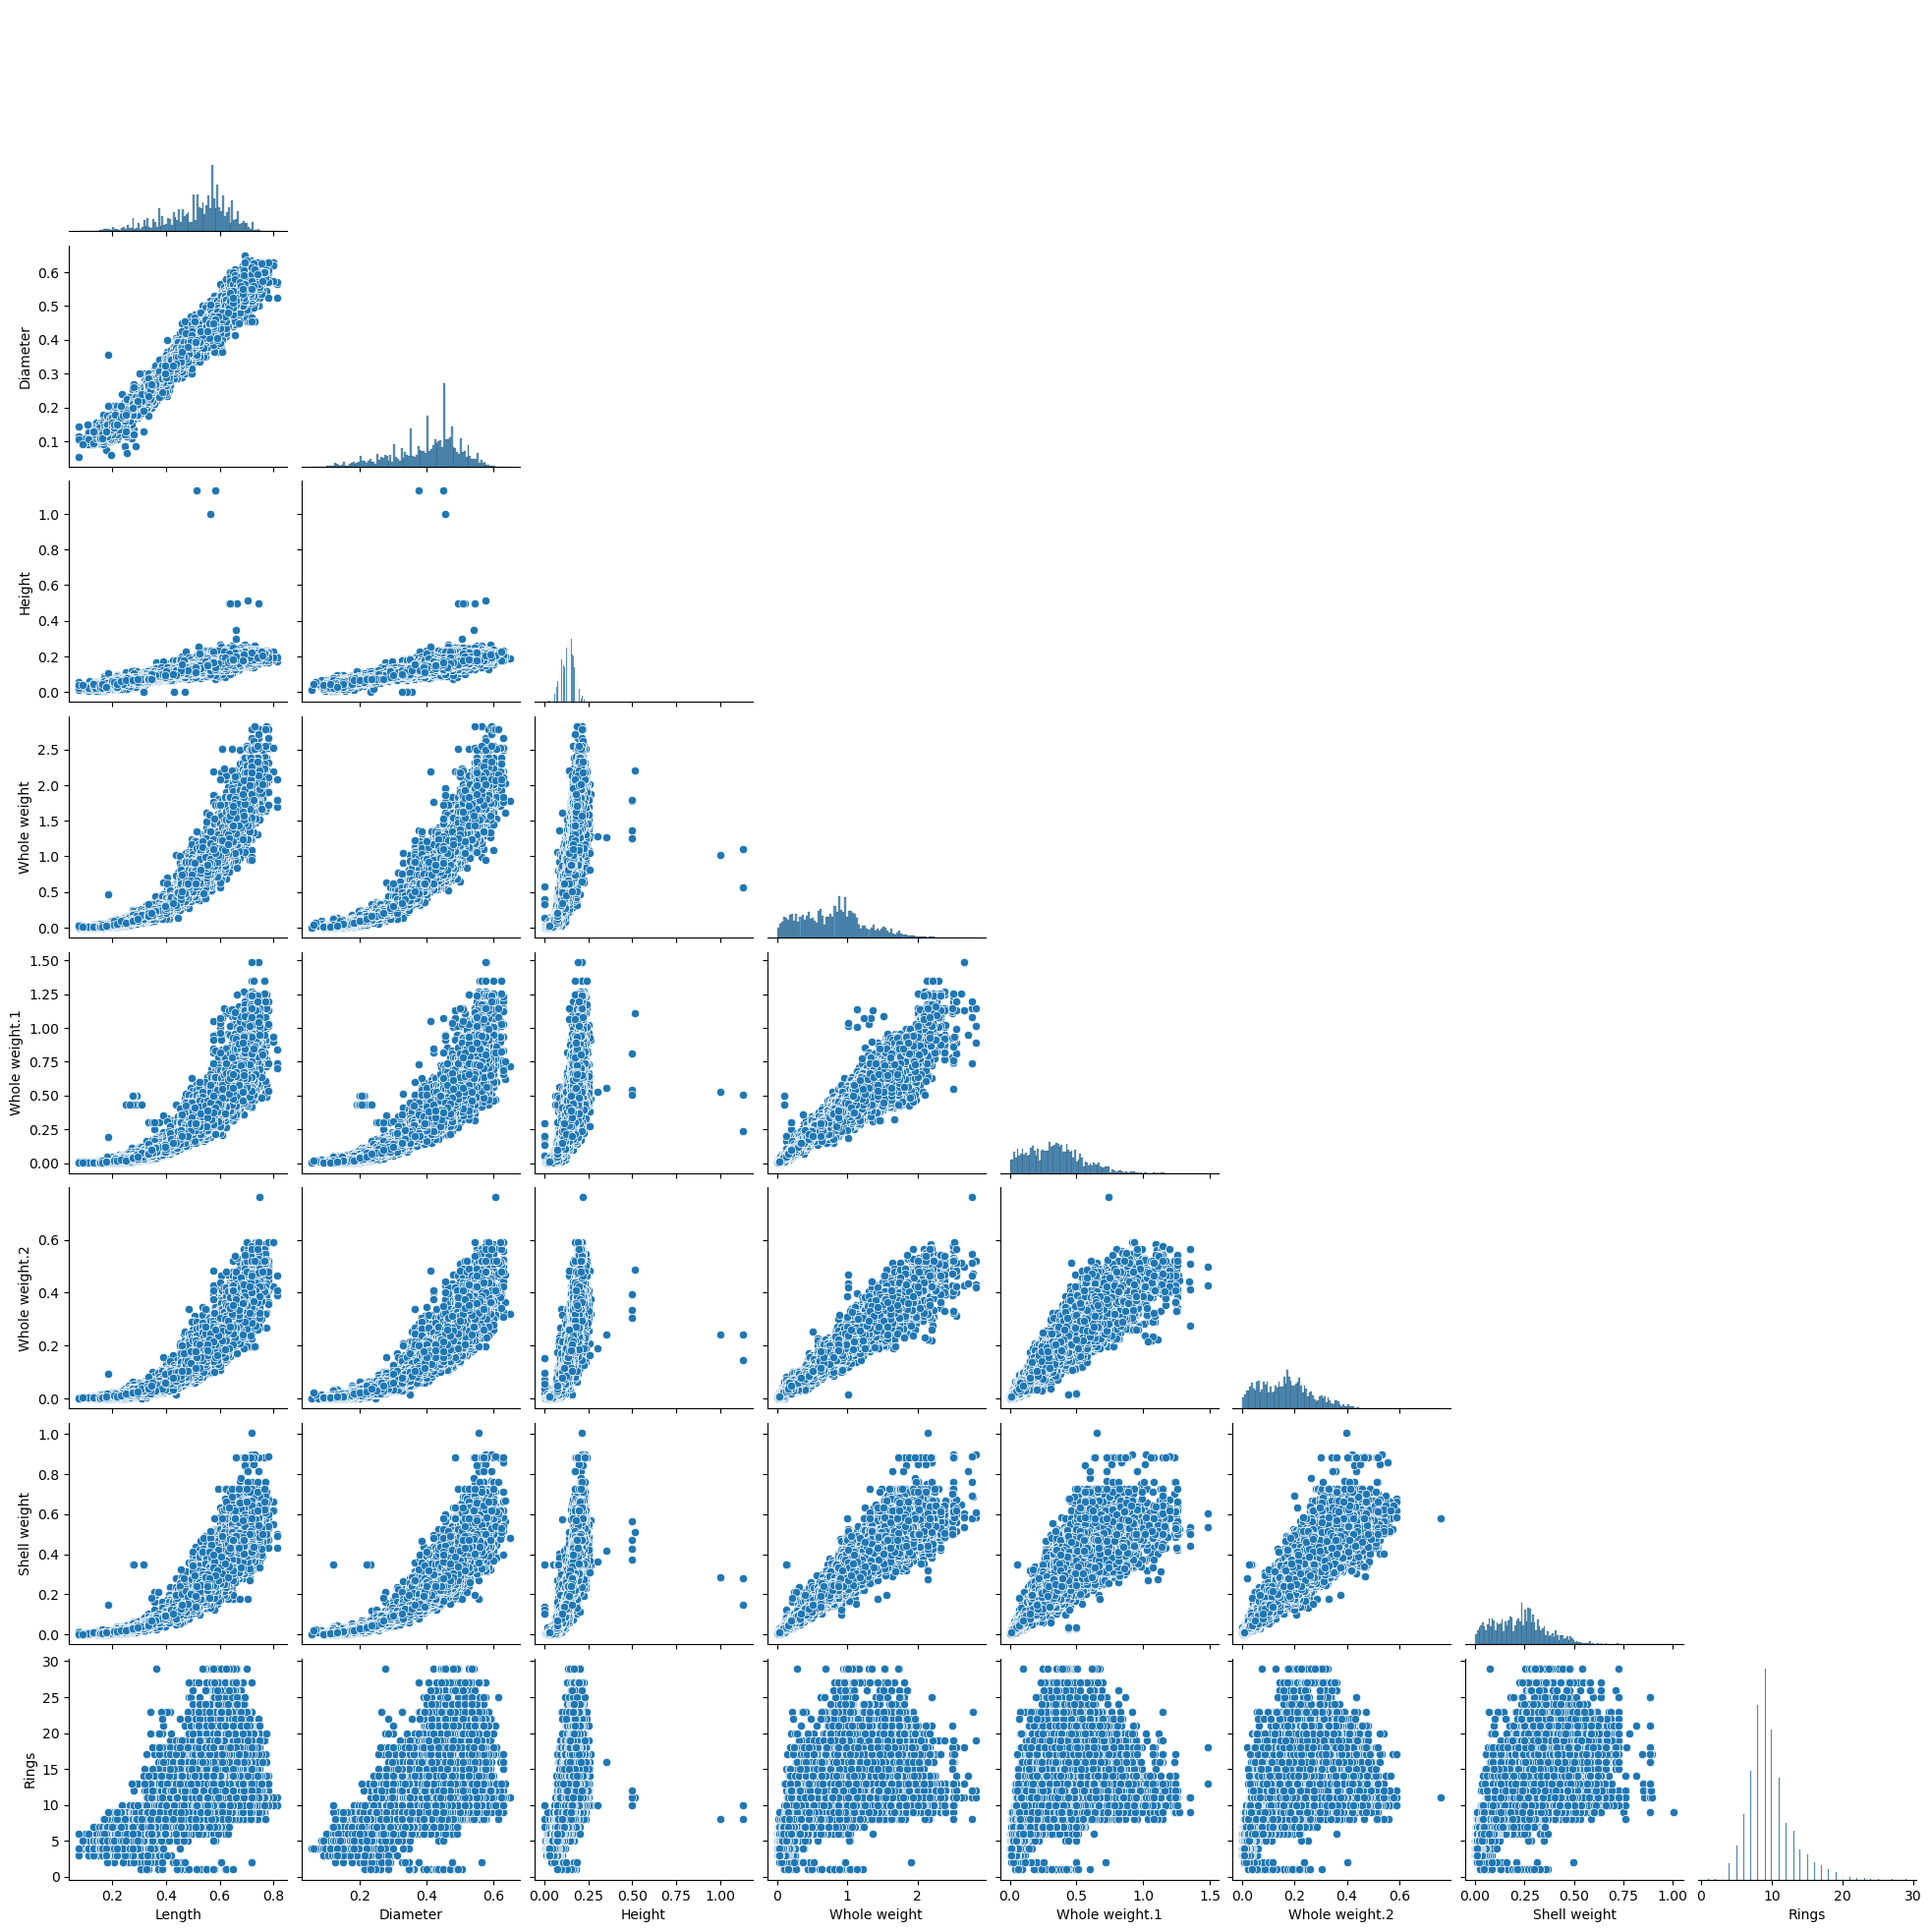

In [891]:
sns.pairplot(data=df, corner=True)

Findings - <br>
. The length feature demonstrates a robust correlation with weight, height, and diameter, with the strongest correlation observed with diameter. This indicates that as length increases of Abalone , weight and diameter also tend to increase.<br>
. Similar trends are observed for the other features, indicating high correlations among all the features in the dataset.

<Axes: >

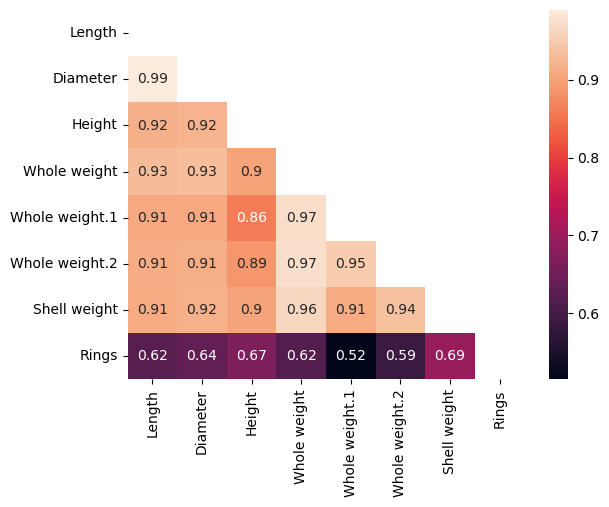

In [892]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, mask=np.triu(corr))

The heatmap reinforces the presence of high correlation among independent features(length, diameter, height, weight), as most values are above 0.9. <br>
Let's examine the correlation between independent features and the target feature 'Ring'

In [893]:
abs(corr['Rings']).sort_values(ascending=False)

Rings             1.000000
Shell weight      0.694766
Height            0.665772
Diameter          0.636832
Length            0.623786
Whole weight      0.617274
Whole weight.2    0.588954
Whole weight.1    0.515067
Name: Rings, dtype: float64

Let's explore the distribution of each feature and use boxplots to identify outliers

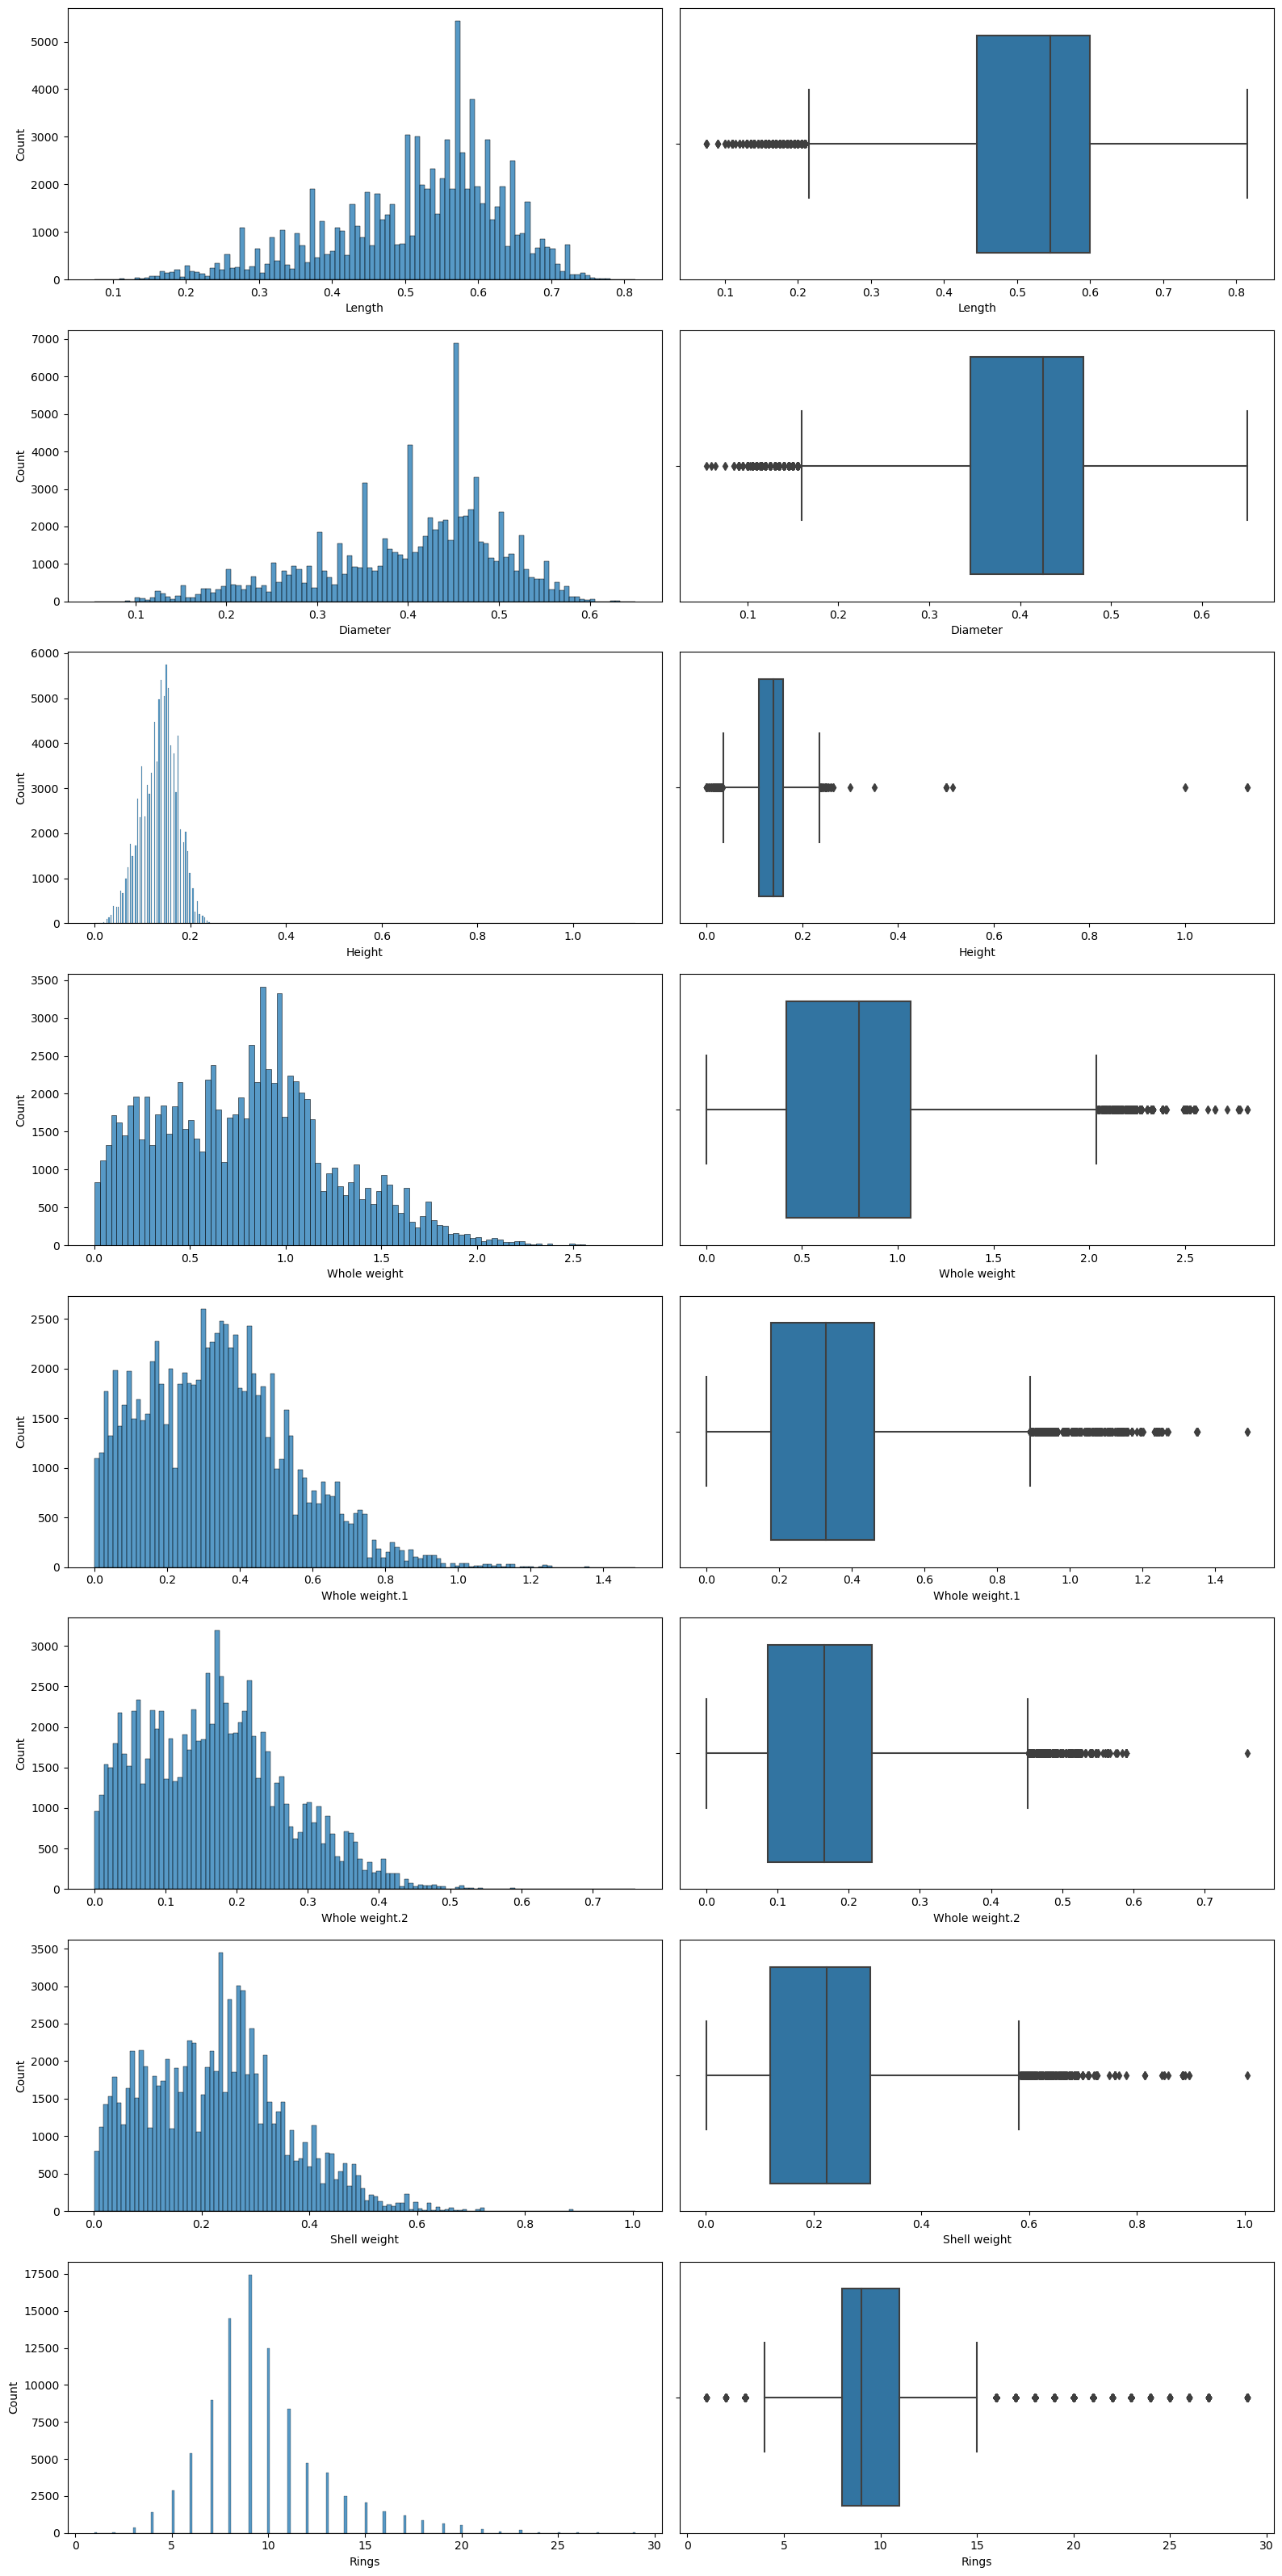

In [894]:
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings']

plt, axes = plt.subplots(8, 2, figsize=(16,32))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, ax=axes[i, 0])
    sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    
plt.tight_layout()
plt.show()

Findings of plotting: <br>
. Majority of lengths fall within the range of 0.2 to approximately 0.75. A few instances where the length is close to 0.1, which could be considered as outliers. <br>
. The height distribution appears to follow a normal distribution, with some outliers evident from the box plots.<br>
. The bulk of the whole weight observations lie within the range of 0 to around 2, with a few instances exceeding 2.5, indicating extreme weights.<br>
. The 'Rings' primarily falls within the range of 5 to 15, indicating the typical age range of the abalones in the dataset.<br>

# Modelling

In [946]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [947]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, shuffle=True)

In [948]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
11615,I,0.175,0.125,0.040,0.0235,0.0090,0.0055,0.0070
68858,F,0.465,0.390,0.125,0.5265,0.2105,0.1185,0.1950
41391,M,0.685,0.525,0.160,1.6465,0.7495,0.3585,0.3995
28574,F,0.590,0.450,0.145,0.8580,0.3415,0.1625,0.2450
77646,I,0.200,0.150,0.065,0.0420,0.0155,0.0125,0.0100
...,...,...,...,...,...,...,...,...
5548,F,0.515,0.395,0.125,0.6765,0.3245,0.1325,0.1650
20228,F,0.600,0.475,0.160,1.0310,0.4340,0.2075,0.2700
12566,I,0.575,0.455,0.140,0.8365,0.3480,0.1765,0.2645
11733,F,0.660,0.530,0.175,1.3905,0.5905,0.2895,0.4530


In [932]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    [('onehotencoder', OneHotEncoder(sparse=False, drop='first'), ['Sex'])],
    remainder='passthrough'  # Pass through any columns not specified
)


In [909]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor


# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    
#     'VotingRegressor': VotingRegressor(estimators=[('lr', LinearRegression()),
#                             ('rf', RandomForestRegressor()),
#                             ('r3', KNeighborsRegressor())]),
#     'StackingRegressor': StackingRegressor(estimators=[
#          ('lr', LinearRegression()),
#          ('rf', RandomForestRegressor()),
#         ('knn', KNeighborsRegressor())], final_estimator=RandomForestRegressor(random_state=42)
#        )
    
}

In [910]:
from sklearn.metrics import mean_squared_log_error
    
for name, model in models.items():
    # Combine the shared preprocessing pipeline with the model-specific pipeline
       
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', model)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.maximum(y_pred, 0) #to ensure that ypred is non-negative value

    print(f"Model:", {name})
    rmsle = mean_squared_log_error(y_test, y_pred) ** 0.5
    print("RMSLE:", rmsle)
    print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
    print("mean_squared_error", mean_squared_error(y_test, y_pred))
    print("r2_score", r2_score(y_test, y_pred))
    print("------")
    print("Train_r2", r2_score(y_train, pipeline.predict(X_train)))
    print("Train_r2", mean_absolute_error(y_train, pipeline.predict(X_train)))
    
    print()

Model: {'Linear Regression'}
RMSLE: 0.16525010023117137
mean_absolute_error 1.378871407422908
mean_squared_error 4.074031709976779
r2_score 0.6076537452564228
------
Train_r2 0.6055866578063814
Train_r2 1.3738536583448975

Model: {'KNeighborsRegressor'}
RMSLE: 0.1349708033186471
mean_absolute_error 1.1289300888373888
mean_squared_error 2.8051823649506153
r2_score 0.729849232133891
------
Train_r2 0.7288131829248901
Train_r2 1.1193312365502397

Model: {'Random Forest Regressor'}
RMSLE: 0.05961688786233187
mean_absolute_error 0.4807228383821663
mean_squared_error 0.5138770181537273
r2_score 0.9505114987255312
------
Train_r2 0.9512180863762956
Train_r2 0.47411642664018094

Model: {'GradientBoostingRegressor'}
RMSLE: 0.15342535788106829
mean_absolute_error 1.2819922140344806
mean_squared_error 3.6240692618332147
r2_score 0.6509870067212395
------
Train_r2 0.6540934296363471
Train_r2 1.2655371602843677



<div style="border: 2px solid pink; border-radius: 10px; padding: 10px; text-align: center;">
    <font size="10" color="red">Increase model capacity.</font>
</div>


# Increase model capacity 
Increasing the model capacity by including more features from PolynomialFeatures. This will add interaction terms like Diameterlength, heightweight, etc. <br>
Let's observe whether the RMSLE error decreases after adding interaction features. <br>
This time only considering LinearRegression, RandomForestRegressor and GradientBoostingRegressor. 

In [911]:
# Define models
models_poly = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

In [912]:
preprocessor_poly = ColumnTransformer(
    [('onehotencoder', OneHotEncoder(sparse=False, drop='first'), ['Sex']), 
    ('poly', PolynomialFeatures(degree=2), ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight'])
    ],
    remainder='passthrough'  # Pass through any columns not specified
)

In [913]:
from sklearn.metrics import mean_squared_log_error
    
for name, model_poly in models_poly.items():
    # Combine the shared preprocessing pipeline with the model-specific pipeline
       
    pipeline = Pipeline([
    ('preprocessor', preprocessor_poly),
    ('scaler', StandardScaler()),
    ('model', model_poly)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.maximum(y_pred, 0) #to ensure that ypred is non-negative value

    print(f"Model:", {name})
    rmsle = mean_squared_log_error(y_test, y_pred) ** 0.5
    print("RMSLE:", rmsle)
    print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
    print("mean_squared_error", mean_squared_error(y_test, y_pred))
    print("r2_score", r2_score(y_test, y_pred))
    print("------")
    print(r2_score(y_train, pipeline.predict(X_train)))
    
    print()

Model: {'Linear Regression'}
RMSLE: 0.15760834254034384
mean_absolute_error 1.3291768486538091
mean_squared_error 3.774269901722682
r2_score 0.636522058307508
------
0.6361859708543808




KeyboardInterrupt



# ANN

In [949]:
import tensorflow as tf
from tensorflow.keras import layers

In [950]:
# Create the pipeline
pipeline_ann = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

In [951]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex']),
                                                 ('poly', PolynomialFeatures(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Whole weight.1',
                                                   'Whole weight.2',
                                                   'Shell weight'])])),
                ('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [952]:
X_train = pipeline_ann.fit_transform(X_train)
X_test = pipeline_ann.transform(X_test)

In [953]:
model_nn = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1)
])

In [954]:
model_nn.compile(loss = tf.keras.losses.MeanSquaredLogarithmicError(),
                      optimizer = tf.keras.optimizers.Adam(), metrics=['mean_squared_logarithmic_error']  )

In [955]:
model_nn.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1813/1813 [==============================] - 4s 2ms/step - loss: 0.1588 - mean_squared_logarithmic_error: 0.1588 - val_loss: 0.0272 - val_mean_squared_logarithmic_error: 0.0272
Epoch 2/20
1813/1813 [==============================] - 3s 2ms/step - loss: 0.0258 - mean_squared_logarithmic_error: 0.0258 - val_loss: 0.0261 - val_mean_squared_logarithmic_error: 0.0261
Epoch 3/20
1813/1813 [==============================] - 3s 2ms/step - loss: 0.0247 - mean_squared_logarithmic_error: 0.0247 - val_loss: 0.0250 - val_mean_squared_logarithmic_error: 0.0250
Epoch 4/20
1813/1813 [==============================] - 3s 2ms/step - loss: 0.0246 - mean_squared_logarithmic_error: 0.0246 - val_loss: 0.0247 - val_mean_squared_logarithmic_error: 0.0247
Epoch 5/20
1813/1813 [==============================] - 3s 2ms/step - loss: 0.0244 - mean_squared_logarithmic_error: 0.0244 - val_loss: 0.0247 - val_mean_squared_logarithmic_error: 0.0247
Epoch 6/20
1813/1813 [==============================] - 3s 2

In [960]:
y_pred_ann = model_nn.predict(X_test)

567/567 [==============================] - 1s 1ms/step


Artificial neural network (ANN) outperformed Linear Regression, Random Forest, K-Nearest Neighbors (KNN), and Gradient Boosting Regressor by a significant margin.

Make Submissions

In [977]:
id = test['id']

In [979]:
test = pipeline_ann.transform(test.drop('id', axis=1))

In [980]:
predictions = model_nn.predict(test)

1888/1888 [==============================] - 2s 1ms/step


In [999]:
# Create the submission DataFrame with string labels
submission_df = pd.DataFrame()

submission_df['id'] = id
submission_df['Rings'] = predictions


In [1004]:
# Save submission file
submission_df.to_csv('submission.csv', index=False)

PS: IF YOU FIND THIS NOTEBOOK HELPFUL, PLEASE CONSIDER UPVOTING IT. YOUR SUPPORT MEANS LOT. THANK YOU!